The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Use CUDA: True
Use MPS: True


  0%|          | 0/50 [00:00<?, ?it/s]

Output()

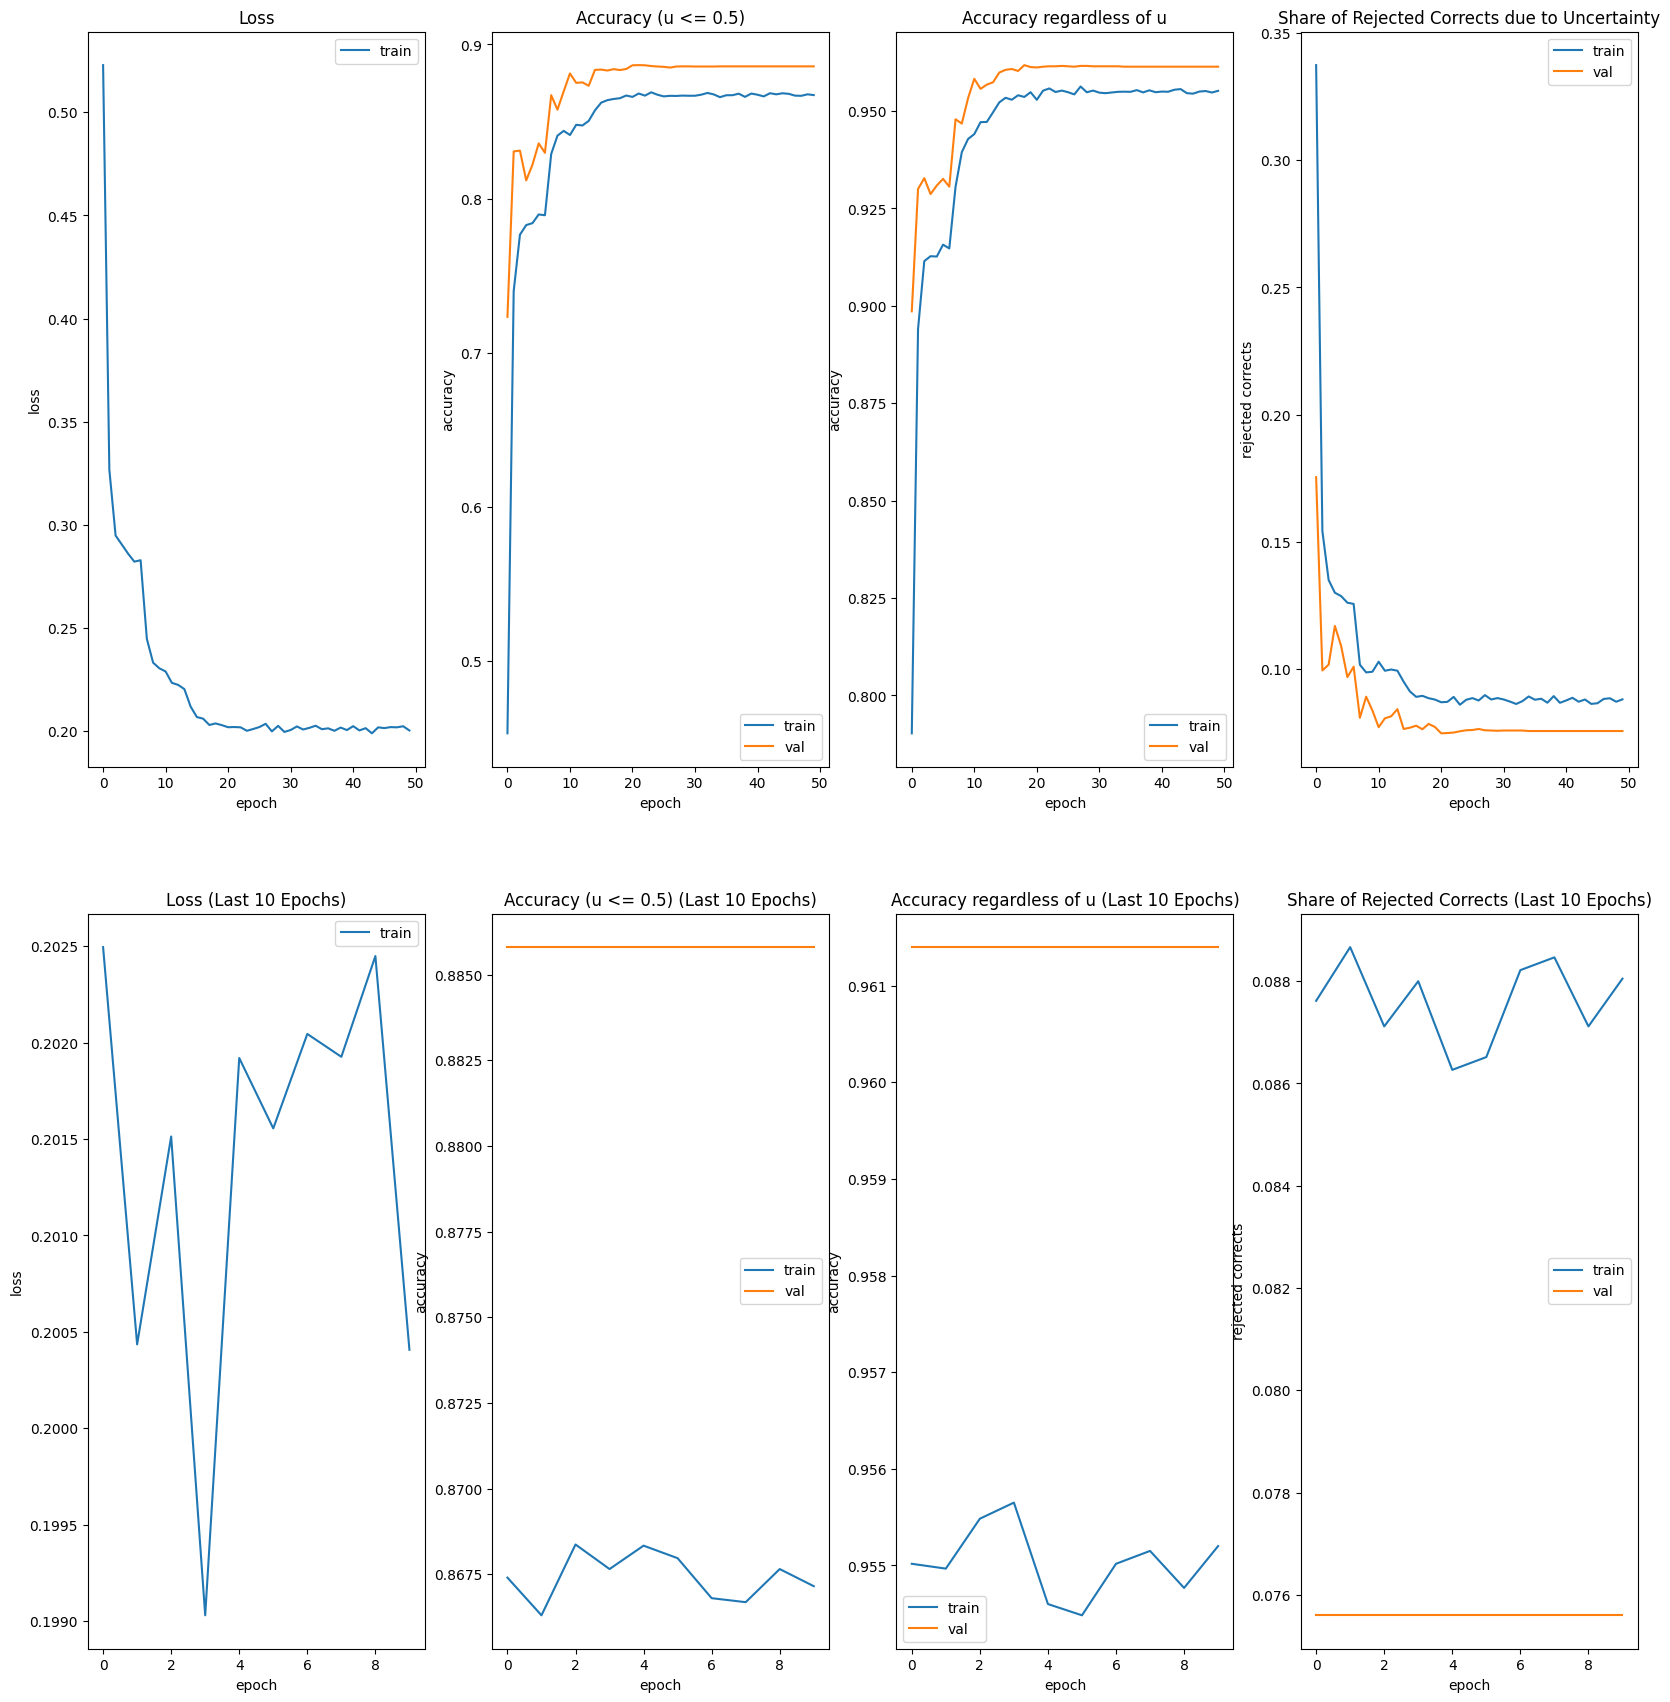

Best Val ACC: 88.66%
Total Runtime: 22:59 (00:28 per Epoch for 50 Epochs)


In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import torch
import numpy as np

from main import main, create_parser

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

parser = create_parser()
args = parser.parse_args(args=[
    "train",
    "--dataset", "mnist",
    "--model", "lenet",
    "--batch-size", "1000",
    "--uncertainty",

    "--epochs", "50",
    "--lr", "1e-3",
    "--weight_decay", "0.005",
    "--step_size", "7",
    "--gamma", "0.1",
    "--uncertainty-loss", "sse",
    "--uncertainty-regularization", "kl",
    "--uncertainty-thresh", "0.5",
    "--save-model",
])
main(args);

# Baseline https://github.com/dougbrion/pytorch-classification-uncertainty

### <span style="color:orange"> *!!! Baseline bases accuracy only on probabilities and not also on uncertainty threshold (= higher accuracy)*: </span>

> ```python
> # Uses the following formula to calculate the accuracy when using uncertainty in train.py
> ...
> running_corrects += torch.sum(preds == labels.data)
> ...
> ```

### Training Log

> ```log
> python main.py --train --dropout --uncertainty --mse --epochs 50
> Epoch 0/49
> ----------
> Training...
> Train loss: 0.4243 acc: 0.7685
> Validating...
> Val loss: 0.1970 acc: 0.9115
> 
> ...
> 
> Epoch 49/49
> ----------
> Training...
> Train loss: 0.2046 acc: 0.9713
> Validating...
> Val loss: 0.1809 acc: 0.9771
> 
> Training complete in 21m 32s
> Best val Acc: 0.977700
> Saved: ./results/model_uncertainty_mse.pt
> ```

| | Paper | Baseline | Baseline (Our Eval) | Own |
| --- | --- | --- | --- | --- |
| regardless of u | - | 97.77% | 96.39% | 96.14% |
| u <  1.0| 99.3% | - | 96.25% | 95.98% |
| u <= 0.5 | - | - | 88.16% | 88.66% |